In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [14]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [15]:
# Definir a arquitetura da rede neural
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instanciar o modelo
model = Net()



In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [17]:
num_epochs = 20

# Listas para armazenar as métricas
train_loss_values = []
train_acc_values = []

# Treinamento do modelo
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calcular métricas de treinamento
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    
    # Adicionar métricas às listas
    train_loss_values.append(train_loss)
    train_acc_values.append(train_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss}, Accuracy: {train_acc}%')



Epoch [1/20], Loss: 1.0611773439244168, Accuracy: 72.52666666666667%
Epoch [2/20], Loss: 0.38581317567876156, Accuracy: 88.81833333333333%
Epoch [3/20], Loss: 0.3213291974829585, Accuracy: 90.51666666666667%
Epoch [4/20], Loss: 0.2883440310210943, Accuracy: 91.52833333333334%
Epoch [5/20], Loss: 0.26201383167826164, Accuracy: 92.35833333333333%
Epoch [6/20], Loss: 0.23890626491672956, Accuracy: 92.995%
Epoch [7/20], Loss: 0.21856539171022266, Accuracy: 93.6%
Epoch [8/20], Loss: 0.20051501370839345, Accuracy: 94.19166666666666%
Epoch [9/20], Loss: 0.18584838190249034, Accuracy: 94.62666666666667%
Epoch [10/20], Loss: 0.17242533659963594, Accuracy: 95.04166666666667%
Epoch [11/20], Loss: 0.1604834886879396, Accuracy: 95.32833333333333%
Epoch [12/20], Loss: 0.1496684295115377, Accuracy: 95.70333333333333%
Epoch [13/20], Loss: 0.1404002852666416, Accuracy: 95.935%
Epoch [14/20], Loss: 0.13151694905918354, Accuracy: 96.20333333333333%
Epoch [15/20], Loss: 0.12376650796531996, Accuracy: 96.4

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy}%')


Accuracy on test set: 96.88%


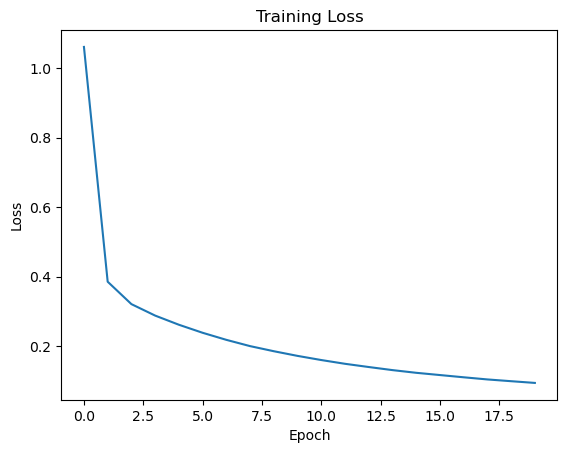

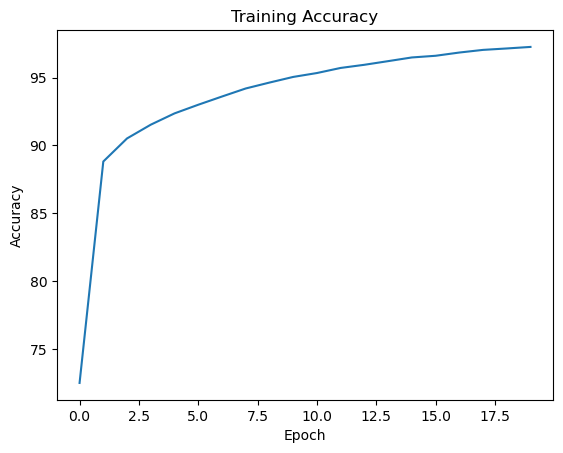

Accuracy on test set: 96.88%


In [19]:
import matplotlib.pyplot as plt
# Plotar gráfico de perda
plt.plot(train_loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Plotar gráfico de acurácia
plt.plot(train_acc_values)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

# Avaliação do modelo no conjunto de teste
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy}%')